In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLA', 'GLA']
patterns1= ['GLA(*_*_)]-GLA(*_*_)', 'GLA(*_*_)-GLA(*_*_)','GLA(*_*_)]-[*]-GLA(*_*_)', 'GLA(*_*_)-[*]-GLA(*_*_)']
patterns2= ['DGalpa1-6DGalpa', 'DGalpa1-6]DGalpa', 'DGalpa1-6[*]DGalpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 16 
valid torsion1 and torsion2: (16, 16)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.D', '2.D'], ['-', '4C1'])
(['3.C', '2.C'], ['4C1', '4C1'])
(['4.H', '3.H'], ['4C1', '4C1'])
(['3.H', '2.H'], ['4C1', '4C1'])
(['4.E', '3.E'], ['4C1', '4C1'])
(['3.E', '2.E'], ['4C1', '4C1'])
(['4.G', '3.G'], ['4C1', '4C1'])
(['3.G', '2.G'], ['4C1', '4C1'])
(['4.F', '3.F'], ['4C1', '4C1'])
(['3.F', '2.F'], ['4C1', '4C1'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['3.C', '2.C'], ['4C1', '4C1'])
(['1.G', '2.G'], ['4C1', 'BO3'])
(['1.H', '2.H'], ['4C1', '1S3'])
(['1.F', '2.F'], ['4C1', '1S3'])
(['1.E', '2.E'], ['4C1', '1C4'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//4rk9.pdb D GLA 3 C1
../../pdbs//4rk9.pdb D GLA 2 O6
6230 6229
Connection found between 6230 and 6229
../../pdbs//4rk9.pdb C GLA 3 C1
../../pdbs//4rk9.pdb C GLA 2 O6
6185 6184
Connection found between 6185 and 6184
../../pdbs//6pre.pdb H GLA 4 C1
../../pdbs//6pre.pdb H GLA 3 O6
12098 12097
Connection found between(2) 12098 and 12097
../../pdbs//6pre.pdb H GLA 3 C1
../../pdbs//6pre.pdb H GLA 2 O6
12087 12086
Connection found between(2) 12087 and 12086
../../pdbs//6pre.pdb E GLA 4 C1
../../pdbs//6pre.pdb E GLA 3 O6
11930 11929
Connection found between(2) 11930 and 11929
../../pdbs//6pre.pdb E GLA 3 C1
../../pdbs//6pre.pdb E GLA 2 O6
11919 11918
Connection found between(2) 11919 and 11918
../../pdbs//6pre.pdb G GLA 4 C1
../../pdbs//6pre.pdb G GLA 3 O6
12042 12041
Connection found between(2) 12042 and 12041
../../pdbs//6pre.pdb G GLA 3 C1
../../pdbs//6pre.pdb G GLA 2 O6
12031 12030
Connection found between(2) 12031 and 12030
../../pdbs//6pre.pdb F GLA 4 C1
../../pdbs//6pre.pdb F

In [13]:
output_df.to_csv('DGalpa1-6DGalpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGalpa1-6DGalpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,4rk9.pdb,D GLA 3 C2 C1 GLA 2 O6 C6,D GLA 3 C1 GLA 2 O6 C6 C5,44.5161,135.687,"([GLA(3_D_), GLA(2_D_)], [37.98, 48.55])",GLA(3_D_)-GLA(2_D_)-GLC(1_D_)-FRU(4_D_),DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.D, 2.D], [-, 4C1])"
1,4rk9.pdb,C GLA 3 C2 C1 GLA 2 O6 C6,C GLA 3 C1 GLA 2 O6 C6 C5,248.2500,206.184,"([GLA(3_C_), GLA(2_C_)], [30.97, 36.39])",GLA(3_C_)-GLA(2_C_)-GLC(1_C_)-FRU(4_C_),DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.C, 2.C], [4C1, 4C1])"
2,6pre.pdb,H GLA 4 C2 C1 GLA 3 O6 C6,H GLA 4 C1 GLA 3 O6 C6 C5,204.3610,223.714,"([GLA(4_H_), GLA(3_H_)], [36.35, 36.96])",GLA(4_H_)-GLA(3_H_)-GLA(2_H_)-GLC(1_H_)-FRU(5_H_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([4.H, 3.H], [4C1, 4C1])"
3,6pre.pdb,H GLA 3 C2 C1 GLA 2 O6 C6,H GLA 3 C1 GLA 2 O6 C6 C5,192.4110,191.115,"([GLA(3_H_), GLA(2_H_)], [36.96, 39.49])",GLA(4_H_)-GLA(3_H_)-GLA(2_H_)-GLC(1_H_)-FRU(5_H_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.H, 2.H], [4C1, 4C1])"
4,6pre.pdb,E GLA 4 C2 C1 GLA 3 O6 C6,E GLA 4 C1 GLA 3 O6 C6 C5,202.6930,223.197,"([GLA(4_E_), GLA(3_E_)], [29.15, 29.84])",GLA(4_E_)-GLA(3_E_)-GLA(2_E_)-GLC(1_E_)-FRU(5_E_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([4.E, 3.E], [4C1, 4C1])"
5,6pre.pdb,E GLA 3 C2 C1 GLA 2 O6 C6,E GLA 3 C1 GLA 2 O6 C6 C5,191.9840,190.174,"([GLA(3_E_), GLA(2_E_)], [29.84, 31.69])",GLA(4_E_)-GLA(3_E_)-GLA(2_E_)-GLC(1_E_)-FRU(5_E_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.E, 2.E], [4C1, 4C1])"
6,6pre.pdb,G GLA 4 C2 C1 GLA 3 O6 C6,G GLA 4 C1 GLA 3 O6 C6 C5,204.8240,222.316,"([GLA(4_G_), GLA(3_G_)], [28.38, 29.52])",GLA(4_G_)-GLA(3_G_)-GLA(2_G_)-GLC(1_G_)-FRU(5_G_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([4.G, 3.G], [4C1, 4C1])"
7,6pre.pdb,G GLA 3 C2 C1 GLA 2 O6 C6,G GLA 3 C1 GLA 2 O6 C6 C5,193.2630,191.155,"([GLA(3_G_), GLA(2_G_)], [29.52, 32.29])",GLA(4_G_)-GLA(3_G_)-GLA(2_G_)-GLC(1_G_)-FRU(5_G_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.G, 2.G], [4C1, 4C1])"
8,6pre.pdb,F GLA 4 C2 C1 GLA 3 O6 C6,F GLA 4 C1 GLA 3 O6 C6 C5,205.5870,225.234,"([GLA(4_F_), GLA(3_F_)], [29.17, 30.92])",GLA(4_F_)-GLA(3_F_)-GLA(2_F_)-GLC(1_F_)-FRU(5_F_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([4.F, 3.F], [4C1, 4C1])"
9,6pre.pdb,F GLA 3 C2 C1 GLA 2 O6 C6,F GLA 3 C1 GLA 2 O6 C6 C5,192.1160,189.275,"([GLA(3_F_), GLA(2_F_)], [30.92, 34.09])",GLA(4_F_)-GLA(3_F_)-GLA(2_F_)-GLC(1_F_)-FRU(5_F_),DGalpa1-6DGalpa1-6DGalpa1-6DGlcpa2-1DFrufb,"([3.F, 2.F], [4C1, 4C1])"


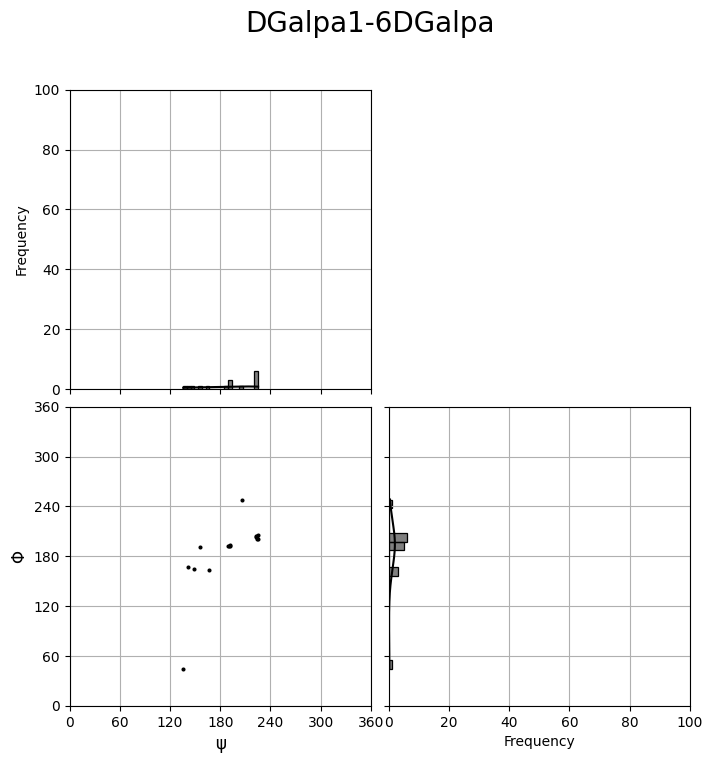

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGalpa1-6DGalpa',max_histogram_scale=100,step_histogram_tick=20)